In [10]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

import torch
import glob
from collections import defaultdict

<IPython.core.display.Javascript object>

In [11]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

import seaborn as sns

sns.set(font_scale=1)
sns.set_style("ticks")

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "14"

# Uncomment for local development
%load_ext nb_black
%load_ext autoreload
%autoreload 2

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

Shared fns

In [12]:
def get_data(files, *keys):
    """Get data keys from saved digit exps."""
    data = defaultdict(list)
    for f in files:
        d = torch.load(f)
        for k in keys:
            data[k].append(d[k])

    return data

<IPython.core.display.Javascript object>

Load and gather data

In [13]:
def load_leak_exps():
    # Load
    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp155*")
    exp155 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s01_*")
    exp157_s01 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s02_*")
    exp157_s02 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp158_s03_*")
    exp158_s03 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp158_s035_*")
    exp158_s035 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp158_s04_*")
    exp158_s04 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s05_*")
    exp157_s05 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s06_*")
    exp157_s06 = get_data(files, "correct")

    # Gather
    model_names = ["0.0", "0.1", "0.2", "0.3", "0.35", "0.4", "0.5", "0.6"]
    models = [
        exp155,
        exp157_s01,
        exp157_s02,
        exp158_s03,
        exp158_s035,
        exp158_s04,
        exp157_s05,
        exp157_s06,
    ]

    # Sanity
    assert len(model_names) == len(models)

    return model_names, models

<IPython.core.display.Javascript object>

In [14]:
model_names, models = load_leak_exps()

<IPython.core.display.Javascript object>

Show example

In [15]:
i = 0
model_names[i], models[i]

('0.0',
 defaultdict(list,
             {'correct': [0.65,
               0.6698,
               0.6726,
               0.687,
               0.6786,
               0.6645,
               0.7206,
               0.6784,
               0.6683,
               0.6844,
               0.6876,
               0.5402,
               0.6789,
               0.6847,
               0.6808,
               0.6459,
               0.679,
               0.6791,
               0.6695,
               0.6871]}))

<IPython.core.display.Javascript object>

Est stats

In [16]:
means = [np.mean(exp["correct"]) for exp in models]
stds = [np.std(exp["correct"]) for exp in models]
medians = [np.median(exp["correct"]) for exp in models]
assert len(means) == len(models)

<IPython.core.display.Javascript object>

Plot means

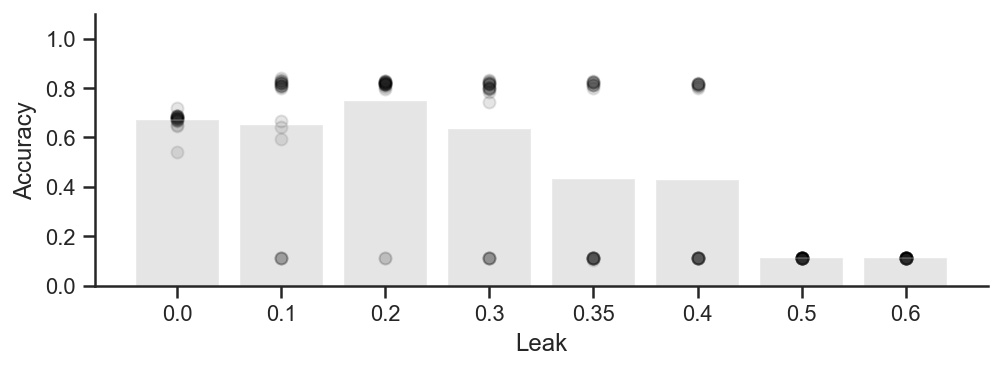

<IPython.core.display.Javascript object>

In [17]:
fig = plt.figure(figsize=(8, 7))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

# Mean
plt.subplot(grid[0, 0])
plt.bar(model_names, means, color="grey", alpha=0.2, width=0.8)
for name, model in zip(model_names, models):
    n = len(model["correct"])
    plt.scatter(x=np.repeat(name, n), y=model["correct"], color="black", alpha=0.1)
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.xlabel("Leak")
_ = sns.despine()

Plot median

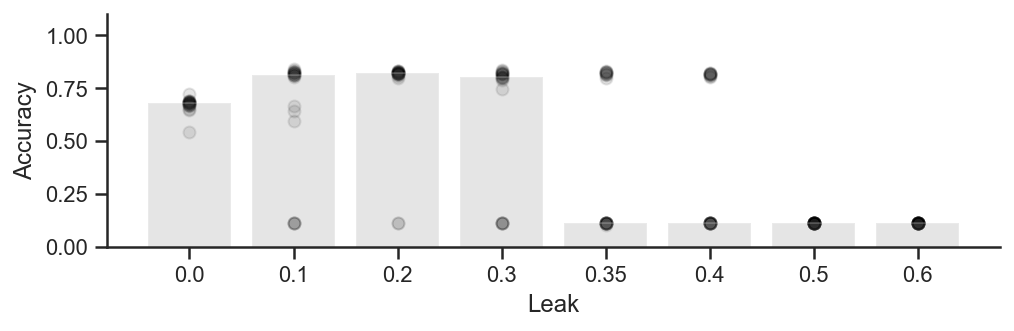

<IPython.core.display.Javascript object>

In [18]:
fig = plt.figure(figsize=(8, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

# Mean
plt.subplot(grid[0, 0])
plt.bar(model_names, medians, color="grey", alpha=0.2, width=0.8)
for name, model in zip(model_names, models):
    n = len(model["correct"])
    plt.scatter(x=np.repeat(name, n), y=model["correct"], color="black", alpha=0.1)
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.xlabel("Leak")
_ = sns.despine()